In [1]:
import pandas as pd
file_path = 'C:\\Users\\17376\\Desktop\\CYX\\study\\5243_Applied DS\\project3\\43project3_data.csv'
df = pd.read_csv(file_path)
print(df.head())

  timestamp                        session_id           event          detail  \
0   17:36.8  81d9553db7534dfa14019c31b43333ab  quiz_submitted  submit_clicked   
1   20:05.2  281fb32c45afcfc5a6999a8a920b1900  quiz_submitted  submit_clicked   
2   28:32.1  835a6c603d6816e41a8d05f05281e606  quiz_submitted  submit_clicked   
3   29:14.5  667e58661d20435ff497800993e114d1  quiz_submitted  submit_clicked   
4   30:15.1  41fb9631e0c2be9e8c0c18df21e52d38  quiz_submitted  submit_clicked   

  version  answered_count  completed  time_spent  
0       B              20       True          28  
1       B              20       True          23  
2       B              20       True          26  
3       B               1      False          11  
4       A               0      False           5  


In [2]:
import pandas as pd
def describe_by_version(df):
    summary = df.groupby('version').agg(
        sample_size=('session_id', 'count'),
        completion_rate=('completed', lambda x: (x == True).mean()),
        avg_answered=('answered_count', 'mean'),
        avg_time_spent=('time_spent', 'mean')
    ).reset_index()

    return summary
summary_stats = describe_by_version(df)
print(summary_stats)


  version  sample_size  completion_rate  avg_answered  avg_time_spent
0       A          146         0.630137     15.061644       77.753425
1       B          117         0.572650     13.538462      118.094017


C:\Users\17376\AppData\Local\Temp\ipykernel_33436\2559712482.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='version', y='completed', order=version_order,
C:\Users\17376\AppData\Local\Temp\ipykernel_33436\2559712482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='version', y='completed', order=version_order,
C:\Users\17376\AppData\Local\Temp\ipykernel_33436\2559712482.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='version', y='answered_count', order=version_order,
C:\Users\17376\AppData\Local\Temp\ipykernel_33436\2559712482.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

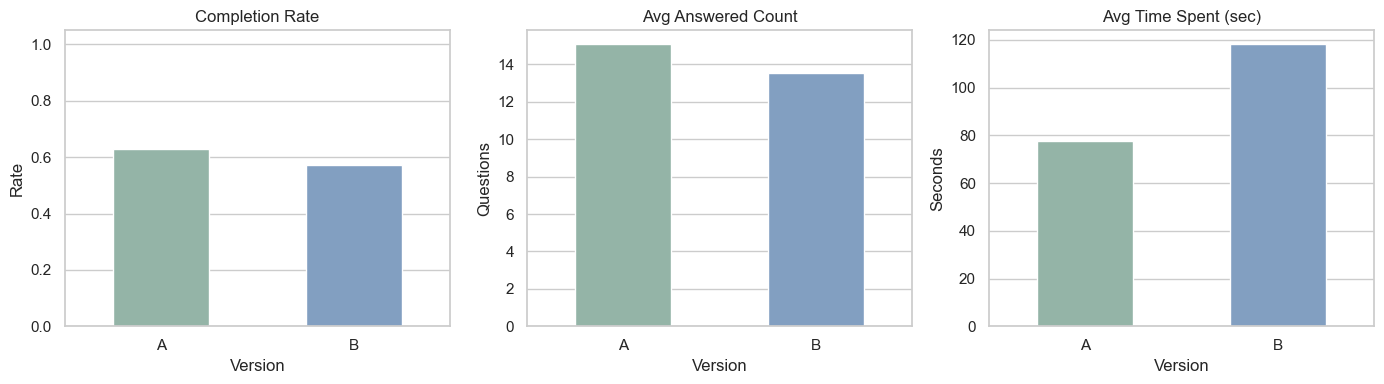

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

version_order = ['A', 'B']
palette = {"A": "#8FB9A8", "B": "#779ECB"}
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.barplot(data=df, x='version', y='completed', order=version_order,
            estimator=lambda x: sum(x)/len(x), ci=None,
            ax=axes[0], palette=palette, width=0.5)
axes[0].set_title('Completion Rate')
axes[0].set_ylabel('Rate')
axes[0].set_ylim(0, 1.05)

sns.barplot(data=df, x='version', y='answered_count', order=version_order,
            ci=None, ax=axes[1], palette=palette, width=0.5)
axes[1].set_title('Avg Answered Count')
axes[1].set_ylabel('Questions')

sns.barplot(data=df, x='version', y='time_spent', order=version_order,
            ci=None, ax=axes[2], palette=palette, width=0.5)
axes[2].set_title('Avg Time Spent (sec)')
axes[2].set_ylabel('Seconds')
for ax in axes:
    ax.set_xlabel('Version')
plt.tight_layout()
plt.show()


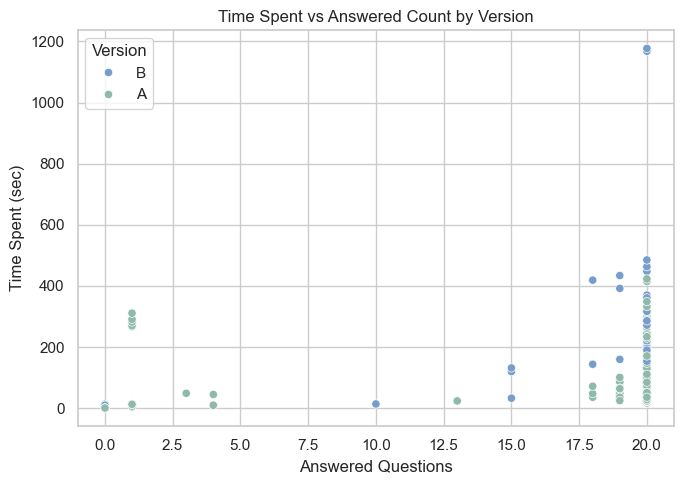

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='answered_count', y='time_spent', hue='version', palette={"A": "#8FB9A8", "B": "#779ECB"})
plt.title('Time Spent vs Answered Count by Version')
plt.xlabel('Answered Questions')
plt.ylabel('Time Spent (sec)')
plt.legend(title='Version')
plt.tight_layout()
plt.show()

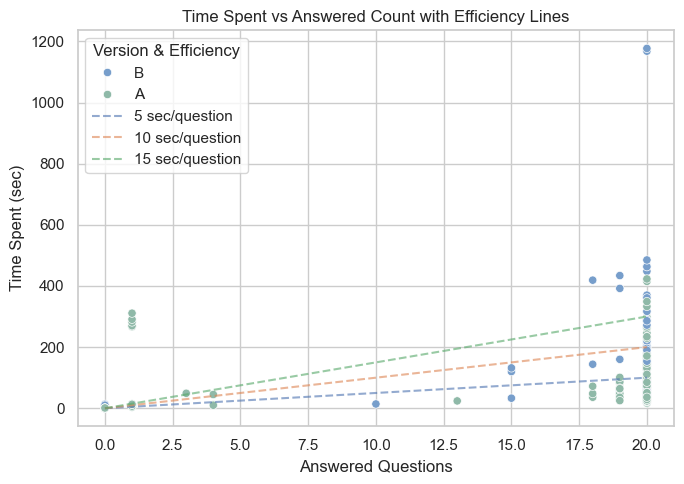

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

sns.scatterplot(data=df, x='answered_count', y='time_spent', hue='version',
                palette={"A": "#8FB9A8", "B": "#779ECB"})

efficiencies = [5, 10, 15] 
x_vals = np.linspace(0, df['answered_count'].max(), 100)

for eff in efficiencies:
    y_vals = eff * x_vals
    plt.plot(x_vals, y_vals, linestyle='--', label=f'{eff:.0f} sec/question', alpha=0.6)

plt.title('Time Spent vs Answered Count with Efficiency Lines')
plt.xlabel('Answered Questions')
plt.ylabel('Time Spent (sec)')
plt.legend(title='Version & Efficiency')
plt.tight_layout()
plt.show()


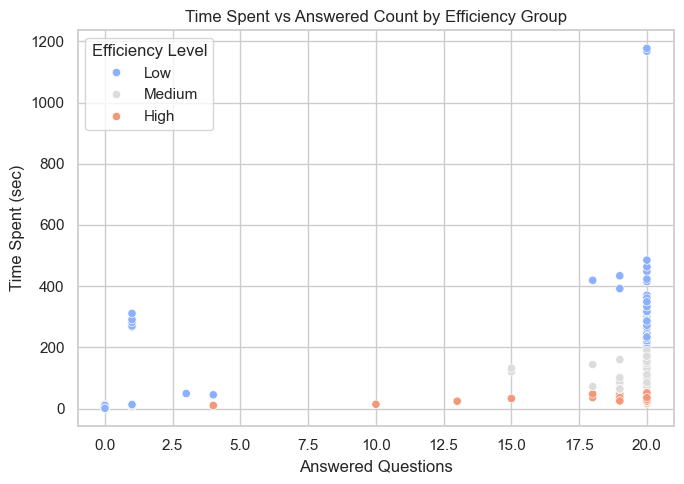

In [27]:
# 新建 efficiency 指标（答题数 / 用时）
df['efficiency'] = df['answered_count'] / df['time_spent']

# 可选：按效率高低分组
df['eff_group'] = pd.qcut(df['efficiency'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='answered_count', y='time_spent', hue='eff_group', palette='coolwarm')
plt.title('Time Spent vs Answered Count by Efficiency Group')
plt.xlabel('Answered Questions')
plt.ylabel('Time Spent (sec)')
plt.legend(title='Efficiency Level')
plt.tight_layout()
plt.show()


 Completed vs Uncompleted：
   completed  sample_size  avg_answered  avg_time_spent
0      False          104      5.798077       46.442308
1       True          159     20.000000      127.918239


C:\Users\17376\AppData\Local\Temp\ipykernel_33436\3712243007.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


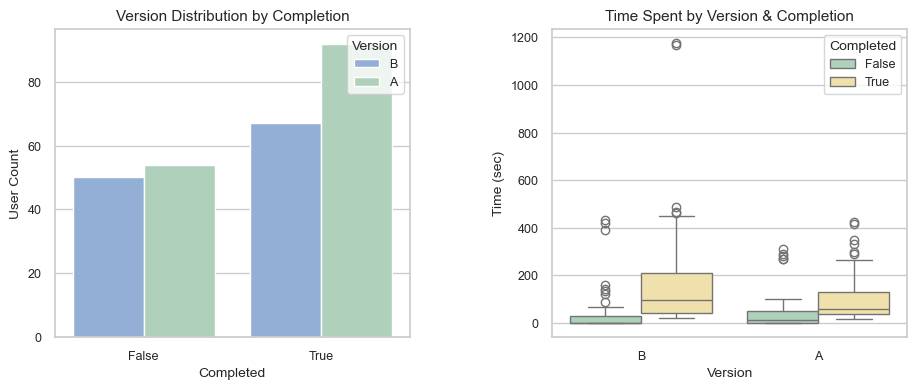

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
summary_by_completion = df.groupby('completed').agg(
    sample_size=('session_id', 'count'),
    avg_answered=('answered_count', 'mean'),
    avg_time_spent=('time_spent', 'mean'),
).reset_index()

print(" Completed vs Uncompleted：")
print(summary_by_completion)


sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(11, 4), gridspec_kw={'wspace': 0.4})

sns.countplot(
    data=df, x='completed', hue='version',
    palette={"A": "#A9D6B8", "B": "#88AEE0"},
    ax=axes[0]
)
axes[0].set_title("Version Distribution by Completion", fontsize=11)
axes[0].set_xlabel("Completed", fontsize=10)
axes[0].set_ylabel("User Count", fontsize=10)
axes[0].legend(title="Version", loc='upper right', fontsize=9, title_fontsize=10)

sns.boxplot(
    data=df, x='version', y='time_spent', hue='completed',
    palette={True: "#FBE7A1", False: "#A9D6B8"},
    ax=axes[1]
)
axes[1].set_title("Time Spent by Version & Completion", fontsize=11)
axes[1].set_xlabel("Version", fontsize=10)
axes[1].set_ylabel("Time (sec)", fontsize=10)
axes[1].legend(title="Completed", loc="upper right", fontsize=9, title_fontsize=10)

for ax in axes:
    ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()


In [47]:
from scipy.stats import ttest_ind, chi2_contingency
import pandas as pd

# Split data by version
group_a = df[df['version'] == 'A']
group_b = df[df['version'] == 'B']

# 1. Completion rate: Chi-square test
# Create a 2x2 contingency table
contingency = pd.crosstab(df['version'], df['completed'])
chi2, p_chi2, _, _ = chi2_contingency(contingency)
print("Chi-Square Test for Completion Rate:")
print(contingency)
print(f"Chi2 = {chi2:.3f}, p = {p_chi2:.4f}")
print()

# 2. Answered count: Independent t-test
t_ans, p_ans = ttest_ind(group_a['answered_count'], group_b['answered_count'], equal_var=False)
print("T-Test for Answered Questions:")
print(f"Group A Mean Answered Count: {group_a['answered_count'].mean():.2f}")
print(f"Group B Mean Answered Count: {group_b['answered_count'].mean():.2f}")
print(f"T = {t_ans:.3f}, p = {p_ans:.4f}")
print()

# 3. Time spent: Independent t-test
t_time, p_time = ttest_ind(group_a['time_spent'], group_b['time_spent'], equal_var=False)
print("T-Test for Time Spent:")
print(f"Group A Mean Time Spent: {group_a['time_spent'].mean():.2f} sec")
print(f"Group B Mean Time Spent: {group_b['time_spent'].mean():.2f} sec")
print(f"T = {t_time:.3f}, p = {p_time:.4f}")


Chi-Square Test for Completion Rate:
completed  False  True 
version                
A             54     92
B             50     67
Chi2 = 0.673, p = 0.4118

T-Test for Answered Questions:
Group A Mean Answered Count: 15.06
Group B Mean Answered Count: 13.54
T = 1.401, p = 0.1625

T-Test for Time Spent:
Group A Mean Time Spent: 77.75 sec
Group B Mean Time Spent: 118.09 sec
T = -2.132, p = 0.0345
